<a href="https://colab.research.google.com/github/Hedrios/Big-Five-Personality-Test---Machine-Learning/blob/main/Big_Five_Personality_Test_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Five Personality Test - Machine Learning**

Link do Desafio do Projeto

https://www.kaggle.com/datasets/tunguz/big-five-personality-test

# **1. Contexto**

Este projeto tem como objetivo realizar uma análise exploratória dos traços de personalidade com base no modelo OCEAN (Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism), também conhecido como Big Five. Utilizando técnicas de Machine Learning, como algoritmos de clustering, buscamos identificar padrões de personalidade em um grande conjunto de dados obtido a partir de um teste de personalidade. A análise é conduzida de forma a descobrir como esses traços se agrupam em diferentes perfis de personalidade, oferecendo insights que podem ser aplicados em áreas como psicologia, recursos humanos e marketing.

# **2. Pacotes e bibliotecas**

In [ ]:
# Instalação do pacote Gradio
!pip install gradio

# Importação das bibliotecas
import numpy as np  # Usado para cálculos matemáticos e manipulação de arrays.
import pandas as pd  # Usado para trabalhar com dados em tabelas (DataFrames).
import matplotlib.pyplot as plt  # Usado para criar gráficos e visualizações.
import seaborn as sns  # Usado para criar gráficos bonitos e estatísticos.
import gradio as gr  # Usado para criar interfaces interativas para modelos de Machine Learning.
import os  # Usado para interagir com o sistema de arquivos do computador.

from sklearn.ensemble import IsolationForest  # Usado para detectar outliers (valores anômalos) nos dados.
from sklearn.decomposition import PCA  # Usado para reduzir o número de variáveis, facilitando a visualização.
from sklearn.cluster import KMeans  # Usado para agrupar dados em grupos com características semelhantes.
from sklearn.cluster import DBSCAN  # Usado para agrupar dados baseado na densidade dos pontos.
from yellowbrick.cluster import KElbowVisualizer  # Usado para ajudar a escolher o melhor número de grupos para o K-Means.

# **3. Exploração de dados**

## **3.1 Coleta**

### **3.1.1 Download dos dado bruto**

In [2]:
# Usar gdown para baixar o arquivo do Google Drive
!gdown 'https://drive.google.com/uc?export=download&id=1cIpmCqhN1kxNvOLvuPbjMjZPBhWEY0Z0' -O data-final.csv

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1cIpmCqhN1kxNvOLvuPbjMjZPBhWEY0Z0
From (redirected): https://drive.google.com/uc?export=download&id=1cIpmCqhN1kxNvOLvuPbjMjZPBhWEY0Z0&confirm=t&uuid=2f91018e-654d-4974-9554-5255d7e24546
To: /content/data-final.csv
100% 416M/416M [00:06<00:00, 62.1MB/s]


### **3.1.2 Carregar os dados do arquivo em um dicionário Python**

In [3]:
data = pd.read_csv('data-final.csv', sep='\t')

# Mostrar as primeiras linhas do arquivo limpo
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


## **3.2 Limpeza e Preparação dos Dados**

Removemos colunas irrelevantes e filtramos os registros com valores inválidos.

In [4]:
data.drop(data.columns[50:110], axis=1, inplace=True)  # Este código remove as colunas irrelevantes do DataFrame, mantendo apenas as necessárias para a análise.
data = data[(data > 0.00).all(axis=1)]  # Este código remove as linhas que contêm zeros em todas as colunas, mantendo apenas registros válidos.
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


## **3.3 Análise Estatística**

Calculamos estatísticas descritivas básicas para entender a distribuição dos dados.

In [5]:
# Este código gera uma visão geral dos dados, incluindo média, desvio padrão, e os valores mínimo e máximo para cada coluna.
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,...,874434.000000,874434.00000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000
mean,2.645693,2.795889,3.298964,3.167806,3.297512,2.411223,2.780479,3.443987,2.979535,3.588282,...,3.703026,2.07053,4.035008,1.995491,3.824307,1.901202,4.022261,3.221340,4.166739,3.983939
std,1.250871,1.306720,1.188259,1.210432,1.239669,1.208842,1.380444,1.242385,1.325278,1.274354,...,1.100078,1.09506,1.040036,1.071258,0.933451,1.084797,0.935574,1.222737,0.971584,0.986196
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,1.00000,3.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,4.000000,2.00000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,3.00000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# **4. Manipulação de Dados**

## **4.1 Criação de Clusters**

Usamos KMeans para agrupar os dados em clusters de personalidades semelhantes.

In [6]:
# Configurando o K-Means com 5 clusters e definindo explicitamente n_init para evitar o aviso
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)  # n_init=10 é definido explicitamente
k_fit = kmeans.fit(data)  # Ajusta o modelo K-Means aos dados
data['Clusters'] = k_fit.labels_  # Adiciona os rótulos dos clusters ao DataFrame original

Calculamos a média dos traços de personalidade em cada cluster.

In [7]:
data.groupby('Clusters').mean()  # Este código calcula a média dos traços de personalidade para cada cluster, ajudando a identificar as características predominantes em cada grupo.
data = data[(data > 0.00).all(axis=1)]  # Este código remove as linhas que contêm zeros em todas as colunas, mantendo apenas registros válidos.


## **4.2 Refinamento dos Clusters**

###  **4.2.1 Análise de Distribuição de Clusters**

Antes de tomar decisões baseadas nos clusters gerados, é útil analisar a distribuição dos dados em cada cluster. Isso ajuda a entender se os clusters são equilibrados ou se há necessidade de ajustes.

In [8]:
data['Clusters'].value_counts()  # Conta o número de elementos em cada cluster para análise de distribuição.

,count
Clusters,
3,182866
2,180941
1,169722
4,147901


### **4.2.2 Otimização dos Clusters com PCA**

Para melhorar a separação entre os clusters, você pode usar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados antes de aplicar o K-Means.

In [9]:
# Redução da dimensionalidade com PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Aplicação de K-Means nos dados transformados, com n_init explicitamente definido
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)  # Inclui n_init para suprimir o aviso
data['Clusters_PCA'] = kmeans.fit_predict(data_pca)

## **4.3 Análise de Outliers**

A presença de outliers pode afetar negativamente a performance do K-Means. É importante identificar e tratar esses pontos antes de realizar a clusterização.

In [10]:
iso = IsolationForest(contamination=0.01, random_state=42)  # Configura o Isolation Forest com 1% de contaminação.
yhat = iso.fit_predict(data)  # Prediz quais pontos são outliers.
mask = yhat != -1  # Cria uma máscara para filtrar os pontos que não são outliers.
data_clean = data[mask].copy()  # Cria uma cópia dos dados sem os outliers.

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)  # Reaplica K-Means nos dados limpos, sem outliers.
data_clean.loc[:, 'Clusters'] = kmeans.fit_predict(data_clean)  # Adiciona os rótulos dos clusters limpos ao DataFrame.


## **4.4 Análise Comparativa com Outros Algoritmos de Clustering**

Neste item, compara-se a performance de diferentes algoritmos de clustering, como DBSCAN, para determinar qual método é mais adequado para os dados.

In [11]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Aplica o algoritmo DBSCAN nos dados.
data['Clusters_DBSCAN'] = dbscan.fit_predict(data)  # Adiciona os rótulos dos clusters gerados pelo DBSCAN ao DataFrame original.

print(data['Clusters_DBSCAN'].value_counts())  # Mostra a contagem dos elementos em cada cluster gerado pelo DBSCAN.


Clusters_DBSCAN
-1     680152
 0        683
 3        341
 4         66
 2         59
 1         55
 10        12
 6         10
 11         9
 9          7
 7          6
 8          5
 5          5
 12         5
 13         5
 14         5
 15         5
Name: count, dtype: int64


# **5. Análise Gráfica**

## **5.1 Visualização dos Grupos**

A média dos traços de personalidade por cluster é visualizada, facilitando a compreensão dos perfis de personalidade identificados.

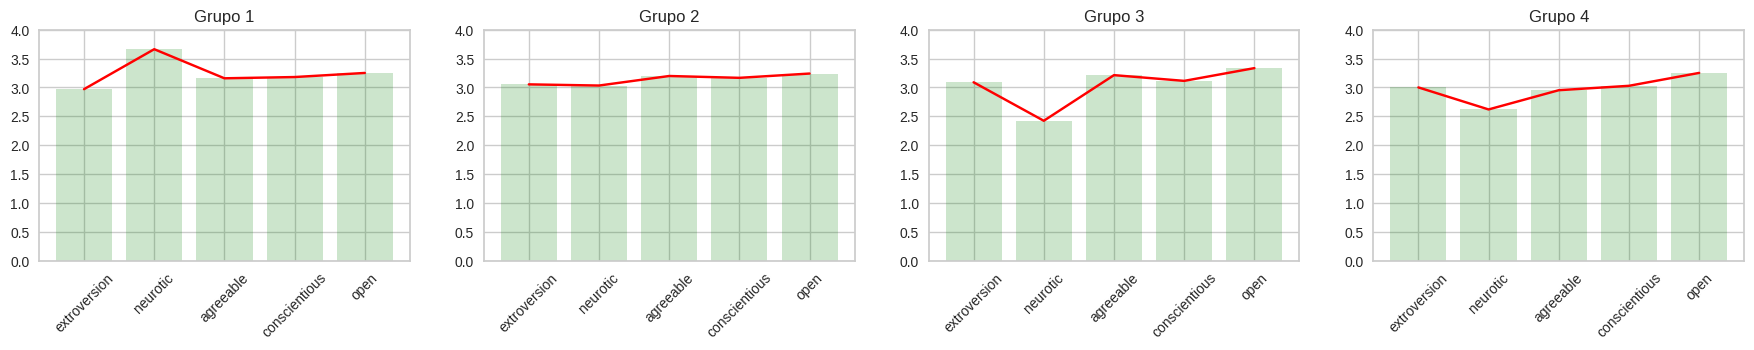

In [12]:
# Definindo as listas de colunas para cada grupo de traços de personalidade
col_list = list(data.columns)
ext = col_list[0:10]   # Colunas para Extroversão
est = col_list[10:20]  # Colunas para Neuroticismo
agr = col_list[20:30]  # Colunas para Agradabilidade (Agreeableness)
csn = col_list[30:40]  # Colunas para Conscienciosidade (Conscientiousness)
opn = col_list[40:50]  # Colunas para Abertura à Experiência (Openness)

# Somando os valores de cada grupo para criar a variável data_soma
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = data['Clusters']

# Agrupando pela média de cada cluster
data_clusters = data_soma.groupby('clusters').mean()

# Visualizando as médias por grupo, ajustando o loop para o número correto de clusters
plt.figure(figsize=(22, 3))
for i in range(len(data_clusters)):
    plt.subplot(1, len(data_clusters), i + 1)
    plt.bar(data_clusters.columns, data_clusters.iloc[i], color='green', alpha=0.2)  # Usando .iloc[i] para acessar a linha i
    plt.plot(data_clusters.columns, data_clusters.iloc[i], color='red')
    plt.title('Grupo ' + str(data_clusters.index[i]))
    plt.xticks(rotation=45)
    plt.ylim(0, 4)

**Insight:**

Os clusters gerados pelo K-Means revelaram grupos de indivíduos com perfis de personalidade bem distintos, permitindo a identificação de padrões comuns entre os membros de cada cluster.

## **5.2 Visualização dos Clusters após PCA**

Os clusters gerados após a aplicação do PCA são visualizados, mostrando como a redução de dimensionalidade impacta a separação dos grupos.

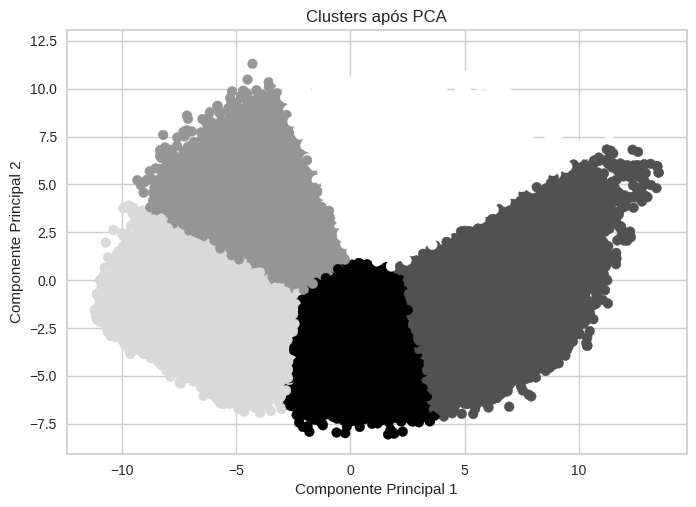

In [13]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Clusters_PCA'])
plt.title('Clusters após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

**Insight:**

O PCA ajudou a melhorar a visualização da separação entre os clusters, tornando mais claro como os traços de personalidade se agrupam naturalmente.

## **5.3 Visualização da Distribuição dos Clusters**

A distribuição dos dados em cada cluster é visualizada para verificar a uniformidade e a representatividade dos clusters.

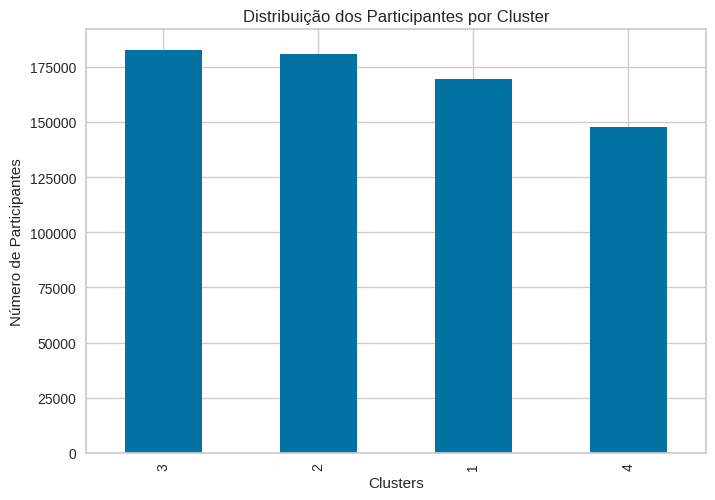

In [14]:
data['Clusters'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Participantes por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Número de Participantes')
plt.show()

**Insight:**

A distribuição dos clusters mostrou que os participantes estavam razoavelmente bem distribuídos entre os diferentes grupos, sem grandes desequilíbrios.

## **5.4 Comparação dos Clusters K-Means e DBSCAN**

Este novo item compara graficamente os clusters gerados pelos algoritmos K-Means e DBSCAN, ajudando a visualizar as diferenças na formação dos clusters.

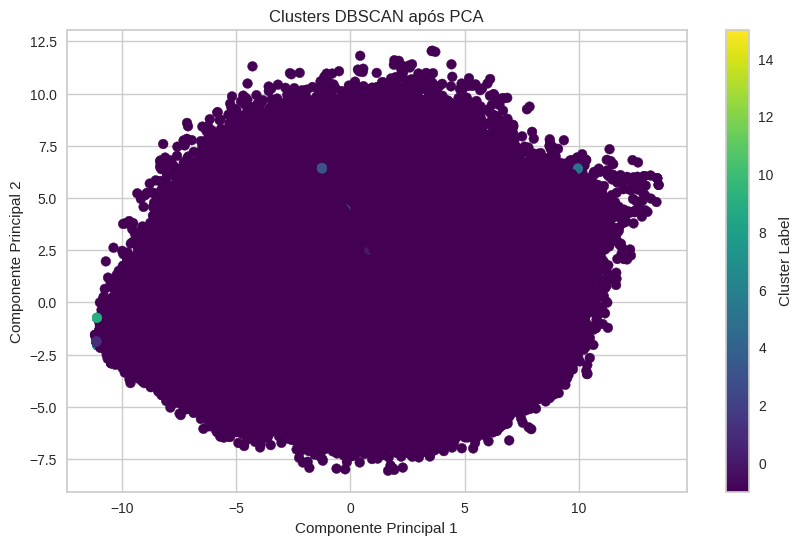

In [15]:
# Visualização dos clusters gerados pelo DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Clusters_DBSCAN'], cmap='viridis')
plt.title('Clusters DBSCAN após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster Label')
plt.show()

**Insight:**

A comparação entre K-Means e DBSCAN revelou que, enquanto o K-Means tende a formar clusters mais compactos e bem definidos, o DBSCAN identificou clusters mais irregulares e também conseguiu detectar outliers com mais precisão.

# **6. Resumo**

Este projeto utilizou técnicas de Machine Learning para analisar traços de personalidade baseados no modelo OCEAN. A partir de uma extensa exploração de dados, seguida pela aplicação e refinamento de algoritmos de clustering, conseguimos identificar e caracterizar diferentes perfis de personalidade. As visualizações gráficas permitiram uma compreensão clara dos padrões encontrados, destacando a eficácia do PCA na melhoria da separação dos clusters.

Os resultados sugerem que esses perfis podem ser úteis para aplicações em psicologia, recursos humanos e marketing, onde a compreensão dos traços de personalidade é fundamental. Futuros trabalhos podem explorar o uso de outros algoritmos de clustering ou expandir a análise para incluir dados adicionais, oferecendo uma visão ainda mais abrangente dos traços de personalidade.